In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.6 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization, Input, MaxPooling2D
from tensorflow.keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow_addons as tfa
from tensorflow.keras.callbacks import ModelCheckpoint
import plotly.express as px
from numpy import expand_dims
import cv2 as cv
import os
from sklearn.utils import shuffle
from  tqdm import tqdm
from sklearn.preprocessing import LabelBinarizer

***Ucitavanje i preprocesiranje trening podataka***

In [199]:
path = '/content/drive/MyDrive/Kompjuterski vid/Projekat/dataset_test_3/train'

In [200]:
test_dir = path
a = fr'{test_dir}/a'
b = fr'{test_dir}/b'
c = fr'{test_dir}/c'
d = fr'{test_dir}/d'
e = fr'{test_dir}/e'
f = fr'{test_dir}/f'
g = fr'{test_dir}/g'
h = fr'{test_dir}/h'
i = fr'{test_dir}/i'
k = fr'{test_dir}/k'
l = fr'{test_dir}/l'
m = fr'{test_dir}/m'
n = fr'{test_dir}/n'
o = fr'{test_dir}/o'
p = fr'{test_dir}/p'
q = fr'{test_dir}/q'
r = fr'{test_dir}/r'
s = fr'{test_dir}/s'
t = fr'{test_dir}/t'
u = fr'{test_dir}/u'
v = fr'{test_dir}/v'
w = fr'{test_dir}/w'
x = fr'{test_dir}/x'
y = fr'{test_dir}/y'
t1 = fr'{test_dir}/t1'
nothing = fr'{test_dir}/nothing'

In [201]:
labels = ['a','b','c','d','e','f','g','h','i','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','t1', 'nothing']

In [202]:
x_train=[]
y_train=[]

for i in labels:
    folderpath = fr'{test_dir}/{i}'
    for j in tqdm(os.listdir(folderpath)):
        img = cv.imread(os.path.join(folderpath,j))
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        img = cv.resize(img,(28,28))
        x_train.append(img)
        y_train.append(i)

x_train = np.array(x_train)
y_train = np.array(y_train)

100%|██████████| 900/900 [00:11<00:00, 81.61it/s]


In [203]:
y_data_new = []
for i in y_train:
    index = labels.index(i)
    if(index>=9):
      y_data_new.append(index+1)
    else:
      y_data_new.append(index)
y_train = y_data_new

y_train = np.array(y_train)

In [204]:
x_train, y_train = shuffle(x_train, y_train, random_state=42)
#y = y_train

In [205]:
print(x_train.shape)
print(y_train.shape)

(31850, 28, 28, 3)
(31850,)


In [206]:
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)

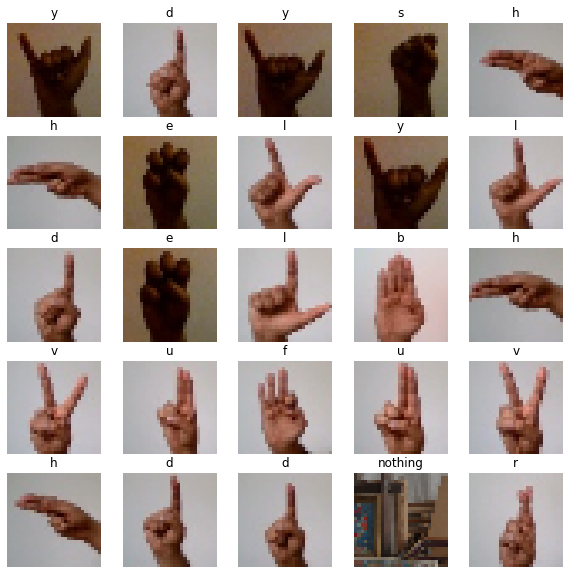

In [207]:
plt.figure(figsize=(10, 10))
for i in range(25):
  ax = plt.subplot(5,5, i + 1)
  plt.title(labels[np.argmax(y_train[i])])
  plt.imshow(x_train[i])
  plt.axis("off")

In [ ]:
#x_train = x_train/255.0

***Ucitavanje i preprocesiranje testnih podataka***

In [208]:
path_test = '/content/drive/MyDrive/Kompjuterski vid/Projekat/dataset_test_3/test'

In [209]:
test_dir = path_test
a = fr'{test_dir}/a'
b = fr'{test_dir}/b'
c = fr'{test_dir}/c'
d = fr'{test_dir}/d'
e = fr'{test_dir}/e'
f = fr'{test_dir}/f'
g = fr'{test_dir}/g'
h = fr'{test_dir}/h'
i = fr'{test_dir}/i'
k = fr'{test_dir}/k'
l = fr'{test_dir}/l'
m = fr'{test_dir}/m'
n = fr'{test_dir}/n'
o = fr'{test_dir}/o'
p = fr'{test_dir}/p'
q = fr'{test_dir}/q'
r = fr'{test_dir}/r'
s = fr'{test_dir}/s'
t = fr'{test_dir}/t'
u = fr'{test_dir}/u'
v = fr'{test_dir}/v'
w = fr'{test_dir}/w'
x = fr'{test_dir}/x'
y = fr'{test_dir}/y'
t1 = fr'{test_dir}/t1'
nothing = fr'{test_dir}/nothing'

In [210]:
x_test=[]
y_test=[]

for i in labels:
    folderpath = fr'{test_dir}/{i}'
    for j in tqdm(os.listdir(folderpath)):
        img = cv.imread(os.path.join(folderpath,j))
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        img = cv.resize(img,(28,28))
        x_test.append(img)
        y_test.append(i)

x_test = np.array(x_test)
y_test = np.array(y_test) 

100%|██████████| 100/100 [00:01<00:00, 83.89it/s]


In [211]:
y_data_new = []
for i in y_test:
    index = labels.index(i)
    if(index>=9):
      y_data_new.append(index+1)
    else:
      y_data_new.append(index)
y_test = y_data_new

y_test = np.array(y_test)

In [212]:
x_test, y_test = shuffle(x_test, y_test, random_state=42)
y = y_test

In [213]:
print(x_test.shape)
print(y_test.shape)

(6336, 28, 28, 3)
(6336,)


In [214]:
label_binarizer = LabelBinarizer()
y_test = label_binarizer.fit_transform(y_test)

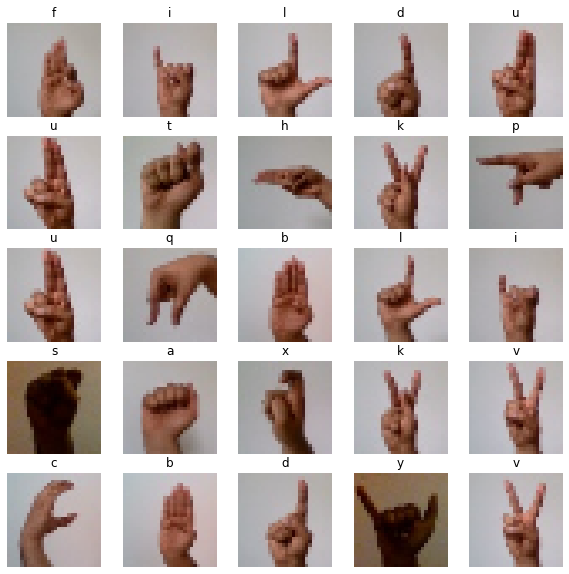

In [215]:
plt.figure(figsize=(10, 10))
for i in range(25):
  ax = plt.subplot(5,5, i + 1)
  plt.title(labels[np.argmax(y_test[i])])
  plt.imshow(x_test[i])
  plt.axis("off")

In [216]:
x_test = x_test/255.0

***Augmentacija***

In [217]:
def show_augmented_images(original_image, datagen):
  image = expand_dims(original_image,0)
  it = datagen.flow(image, batch_size=1)  
  for i in range(3):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    aug_image = batch[0]
    plt.title("Aug")
    plt.imshow(aug_image)
    plt.axis("off")
  plt.show()

In [218]:
def visualize_data_gen(datagen,x_train,y_train,batch_size):
    fig = plt.figure(figsize=(14, 6))
    fig.patch.set_facecolor('white')
    for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=batch_size):
      for i in range(3 * 7):
        plt.subplot(3, 7, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(X_batch[i])
      plt.show()
      break

In [219]:
from sklearn.model_selection import train_test_split
(trainX, validationX, trainY, validationY) = train_test_split(
                                x_train,y_train, 
                                test_size=0.2, 
                                random_state=42) 

In [234]:
datagen_x_train_aug = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    brightness_range=(0.6,1.0)
)

datagen_x_train_aug.fit(trainX)

In [236]:
datagen_x_validation_aug = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    brightness_range=(0.6,1.0)
)

datagen_x_validation_aug.fit(validationX)

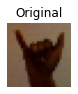

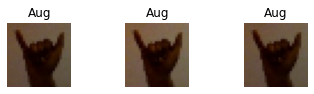

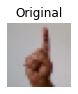

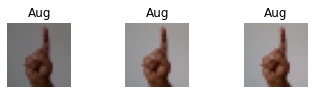

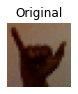

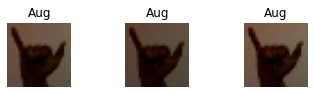

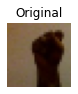

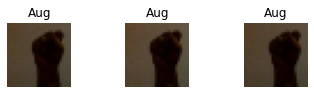

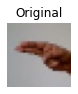

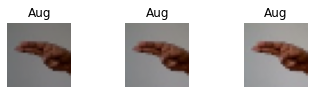

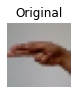

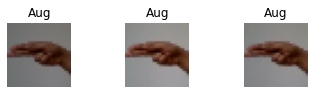

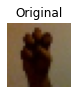

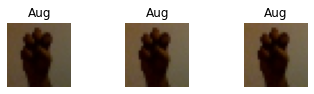

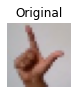

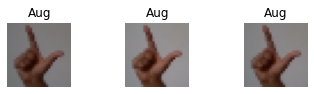

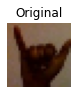

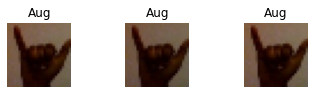

In [237]:
for i in range(9):
  plt.subplot(3,3,i+1)
  original_image = x_train[i]
  plt.title("Original")
  plt.axis("off")
  plt.imshow(original_image)
  plt.show()
  show_augmented_images(original_image, datagen_x_train_aug)

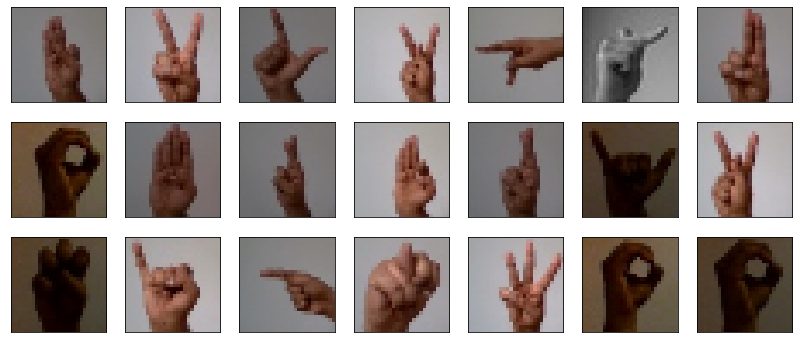

In [238]:
visualize_data_gen(datagen_x_train_aug,x_train,y_train,32)

***Ucitavanje modela i fine tuning***

In [251]:
def plot_loss_accuracy(history):
  epochs = [i for i in range(30)]
  fig , ax = plt.subplots(1,2)
  train_acc = history.history['accuracy']
  train_loss = history.history['loss']
  val_acc = history.history['val_accuracy']
  val_loss = history.history['val_loss']
  fig.set_size_inches(16,9)
  
  ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
  ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
  ax[0].set_title('Training & Validation Accuracy')
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Accuracy")
  
  ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
  ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
  ax[1].set_title('Training & Validation Loss')
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Loss")
  plt.show()

In [240]:
model_pom = tf.keras.models.load_model('/content/drive/MyDrive/Kompjuterski vid/Projekat/Projekat_v4/Modeli_v4/model_rgb_aug3.hdf5')

In [241]:
model_pom.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 75)        2100      
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 75)       300       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 75)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 50)       200   

In [242]:
model_pom1 = Model(model_pom.input, model_pom.layers[-2].output)
model_pom1.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 75)        2100      
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 75)       300       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 75)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 50)       200

In [243]:
x = model_pom1.output
x = Dense(26, activation='softmax')(x)
model = Model(inputs=model_pom1.input, outputs=x)

In [244]:
model.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 75)        2100      
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 75)       300       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 75)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 50)       200

In [245]:
for layer in model.layers[:7]:
    layer.trainable = False
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 conv2d False
2 batch_normalization False
3 max_pooling2d False
4 conv2d_1 False
5 batch_normalization_1 False
6 max_pooling2d_1 False
7 conv2d_2 True
8 batch_normalization_2 True
9 max_pooling2d_2 True
10 flatten True
11 dense True
12 dropout True
13 dense_6 True


In [246]:
model.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 75)        2100      
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 75)       300       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 75)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 50)       200

In [247]:
path = '/content/drive/MyDrive/Kompjuterski vid/Projekat/Projekat_v4/Modeli_v4/model_rgb_aug3_FT_1.hdf5'

save_callback = ModelCheckpoint(
  filepath=path,
  save_best_only=True,
  monitor="val_loss",
  verbose=1,
)

In [248]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy', metrics = ['accuracy', tfa.metrics.F1Score(num_classes=26),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [249]:
history = model.fit(datagen_x_train_aug.flow(trainX,trainY, batch_size = 32), 
                                  validation_data=datagen_x_validation_aug.flow(validationX,validationY, batch_size = 8), 
                                  epochs=30, verbose=1, callbacks=[save_callback])

Epoch 1/30
796/797 [============================>.] - ETA: 0s - loss: 0.1065 - accuracy: 0.9742 - f1_score: 0.9740 - precision_5: 0.9858 - recall_5: 0.9686
Epoch 1: val_loss improved from inf to 0.00087, saving model to /content/drive/MyDrive/Kompjuterski vid/Projekat/Projekat_v4/Modeli_v4/model_rgb_aug3_FT_1.hdf5
797/797 [==============================] - 18s 22ms/step - loss: 0.1063 - accuracy: 0.9743 - f1_score: 0.9740 - precision_5: 0.9859 - recall_5: 0.9686 - val_loss: 8.7174e-04 - val_accuracy: 0.9998 - val_f1_score: 0.9998 - val_precision_5: 0.9998 - val_recall_5: 0.9998
Epoch 2/30
794/797 [============================>.] - ETA: 0s - loss: 0.0024 - accuracy: 0.9996 - f1_score: 0.9996 - precision_5: 0.9996 - recall_5: 0.9995
Epoch 2: val_loss improved from 0.00087 to 0.00072, saving model to /content/drive/MyDrive/Kompjuterski vid/Projekat/Projekat_v4/Modeli_v4/model_rgb_aug3_FT_1.hdf5
797/797 [==============================] - 15s 19ms/step - loss: 0.0024 - accuracy: 0.9996 - f1

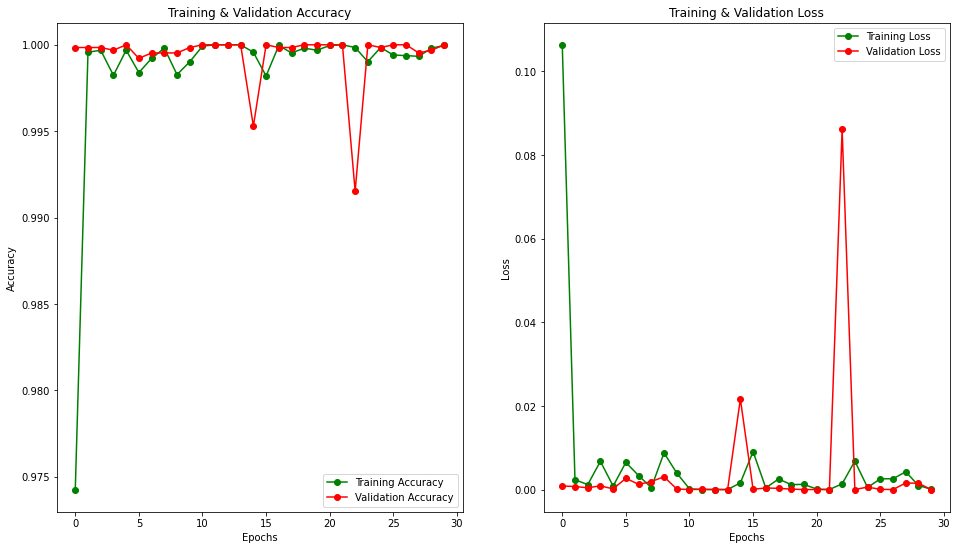

In [252]:
plot_loss_accuracy(history)

***Predikcija***

In [253]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Kompjuterski vid/Projekat/Projekat_v4/Modeli_v4/model_rgb_aug3_FT_1.hdf5')

In [254]:
x_train=x_train/255.0

In [255]:
model.evaluate(x_train, y_train)

996/996 [==============================] - 5s 5ms/step - loss: 1.5218e-06 - accuracy: 1.0000 - f1_score: 1.0000 - precision_5: 1.0000 - recall_5: 1.0000


[1.5217641475828714e-06,
 1.0,
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32),
 1.0,
 1.0]

In [256]:
model.evaluate(x_test, y_test)

198/198 [==============================] - 1s 5ms/step - loss: 0.0754 - accuracy: 0.9891 - f1_score: 0.9881 - precision_5: 0.9893 - recall_5: 0.9891


[0.07541962713003159,
 0.9891098737716675,
 array([1.        , 1.        , 1.        , 0.99800396, 1.        ,
        0.97119343, 0.89082974, 0.9157509 , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.98373985, 1.        , 1.        , 0.984252  ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        0.94736844], dtype=float32),
 0.9892659783363342,
 0.9891098737716675]

In [257]:
predict_x= model.predict(x_test) 
predictions=np.argmax(predict_x,axis=1)
print(predictions)

198/198 [==============================] - 1s 2ms/step
[ 5  8 10 ... 20 21  3]


In [258]:
for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1

In [259]:
print(classification_report(y,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       250
           2       1.00      1.00      1.00       250
           3       1.00      1.00      1.00       250
           4       1.00      1.00      1.00       250
           5       1.00      0.94      0.97       250
           6       0.98      0.82      0.89       250
           7       0.84      1.00      0.92       250
           8       1.00      1.00      1.00       250
          10       1.00      1.00      1.00       250
          11       1.00      1.00      1.00       250
          12       1.00      1.00      1.00       250
          13       1.00      1.00      1.00       250
          14       1.00      1.00      1.00       250
          15       1.00      1.00      1.00       250
          16       1.00      1.00      1.00       250
          17       1.00      0.97      0.98       250
          18       1.00    

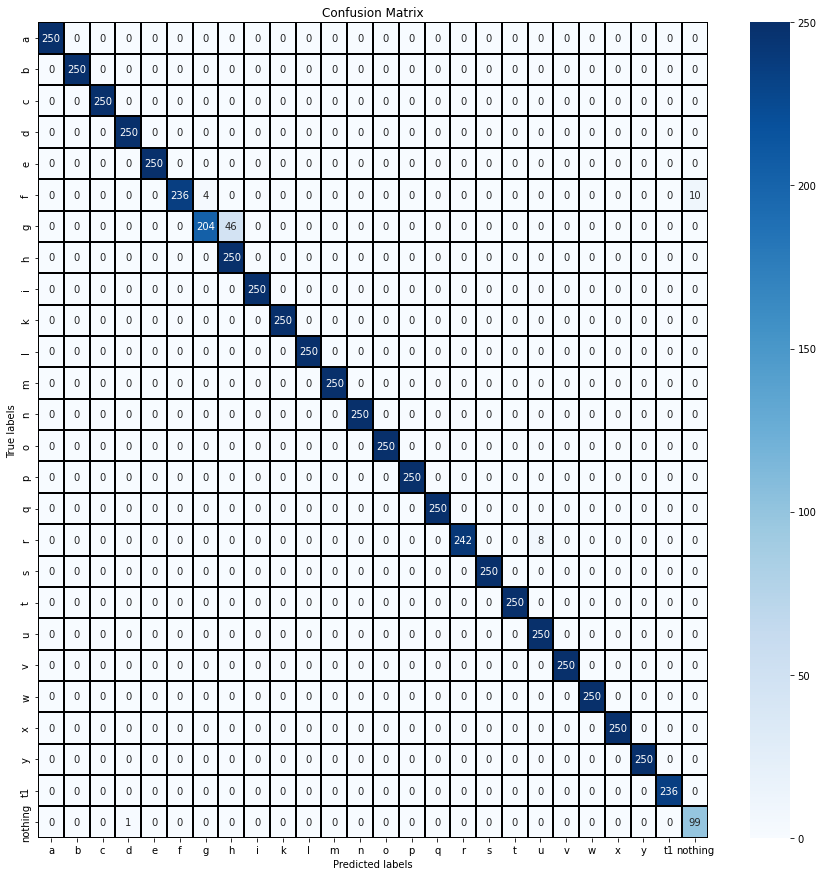

In [260]:
cm = confusion_matrix(y,predictions)
cm = pd.DataFrame(cm, index = [i for i in range(27) if i!=9] , columns = [i for i in range(27) if i!=9])
plt.figure(figsize = (15,15))
ax= plt.subplot()
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);